In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Generate data
# Parameters
firing_rate = 4  # Hz
duration = 600.0  # seconds
laser_interval = 2.0  # seconds
spike_probability = 0.8

# Opto-tagging parameters (gamma distribution)
latency = 0.003
gamma_shape = 8
gamma_scale = 0.0005
# Mean latency: 0.003 + 0.0005 * 8 = 0.007

# Generate spontaneous spikes
np.random.seed(0)
n_spikes = int(duration * firing_rate * 1.2)
iti = np.random.exponential(1/firing_rate, n_spikes)
spikes_original = np.cumsum(iti)
spikes_original = spikes_original[spikes_original < duration]

mean_fr = len(spikes_original) / duration
print(f"Mean firing rate: {mean_fr:.2f} Hz")

# Generate laser pulses and stimulated spikes
lasers = np.arange(0, duration, laser_interval)
n_laser = len(lasers)
mask = np.random.rand(n_laser) < spike_probability
spikes_laser = lasers[mask] + latency + np.random.gamma(gamma_shape, gamma_scale, np.sum(mask))

spikes_tagged = np.sort(np.concatenate([spikes_original, spikes_laser]))

Mean firing rate: 3.87 Hz


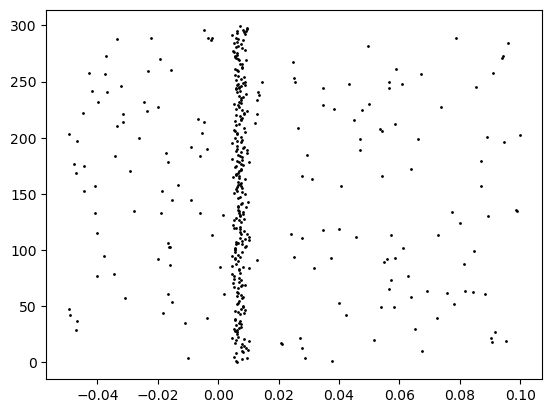

In [2]:
## 2. Plot raster
window = [-0.05, 0.10]
bin_size = 0.001

xs = []
ys = []
for i, laser in enumerate(lasers):
    in_window = (spikes_tagged > (laser + window[0])) & (spikes_tagged < (laser + window[1]))
    spike_aligned = spikes_tagged[in_window] - laser
    xs.append(spike_aligned)
    ys.append(np.ones_like(spike_aligned) * i)

xs = np.concatenate(xs)
ys = np.concatenate(ys)

plt.scatter(xs, ys, s=1, c='k')

<BarContainer object of 150 artists>

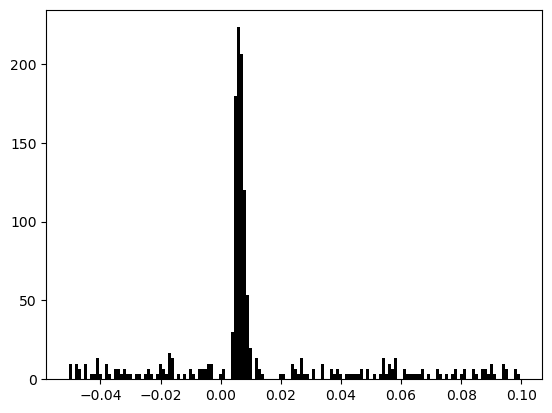

In [3]:
## 3. Plot psth
psth, bins = np.histogram(xs, bins=np.arange(window[0], window[1], bin_size))
fr = psth / n_laser / bin_size
plt.bar(bins[:-1], fr, width=bin_size, color='k')

p-value: 0.0


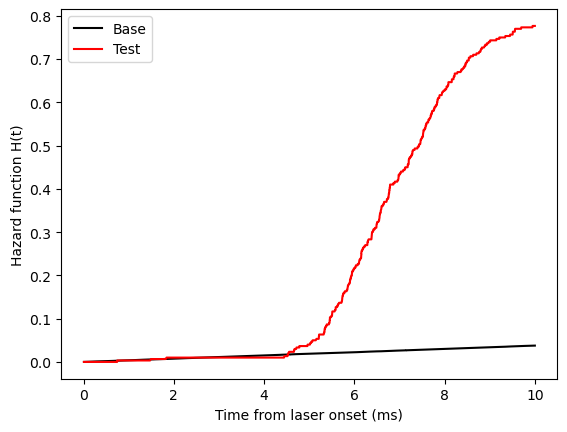

In [4]:
## 4. Test logrank
from ephys import tagging

p_value, times, H1, H2 = tagging.test_logrank(spikes_tagged, lasers, window=0.010, latency=0.000, n_base=None)

print(f"p-value: {p_value}")

plt.plot(1000*times, H1, 'k', label="Base")
plt.plot(1000*times, H2, 'r', label="Test")
plt.xlabel("Time from laser onset (ms)")
plt.ylabel("Hazard function H(t)")
plt.legend()

p-value: 0.1669074185670304


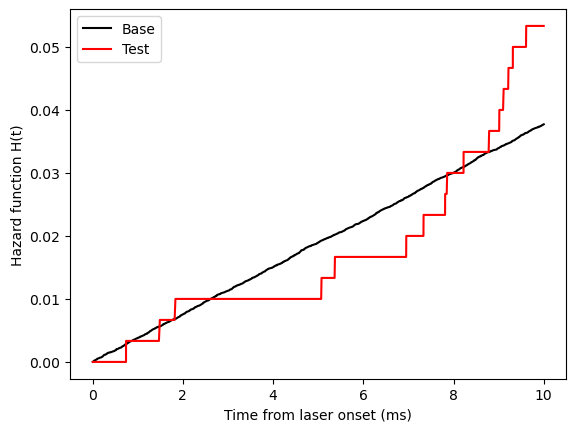

In [5]:
# Also test an untagged neuron
p_value, times, H1, H2 = tagging.test_logrank(spikes_original, lasers, window=0.010, latency=0.000, n_base=None)

print(f"p-value: {p_value}")

plt.plot(1000*times, H1, 'k', label="Base")
plt.plot(1000*times, H2, 'r', label="Test")
plt.xlabel("Time from laser onset (ms)")
plt.ylabel("Hazard function H(t)")
plt.legend()

In [ ]:
## 5. SALT test
from ephys import tagging

p, I = tagging.test_salt(spikes_tagged, lasers, window=0.010, latency=0.000, n_base=None)
print(f"p-value: {p}")
print(f"Information difference: {I}")

ModuleNotFoundError: No module named 'tagging'

In [7]:
# SALT test for an untagged neuron
p, I = tagging.test_salt(spikes_original, lasers, window=0.010, latency=0.000, n_base=None)
print(f"p-value: {p}")
print(f"Information difference: {I}")

p-value: 0.5067037017253352
Information difference: -0.00024728564312676005
